# Titanic challenge, koło data science, wizualizacja danych

https://www.kaggle.com/competitions/titanic

## Słownik danych

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

Notatki do zmiennych:

**pclass**: A proxy for socio-economic status (SES)

- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Odczyt danych

In [2]:
df = pd.read_csv('train.csv')

## Bazowa wizualizacja

In [3]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
display(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

## Imputacja brakujących danych
Ze względu na ogromne braki w kolumnie Cabin nie będziemy uzupełniać tych danych w szczególności ze względu na fakt, że są to dane tekstowe i takowa imputacja byłaby trudna

In [7]:
pc1med = df.query('Pclass == 1')['Age'].median()
pc2med = df.query('Pclass == 2')['Age'].median()
pc3med = df.query('Pclass == 3')['Age'].median()

def fill_age(row):
    age = row['Age']
    pclass = row['Pclass']
    if pd.isnull(age):
        if pclass == 1:
            return pc1med
        elif pclass == 2:
            return pc2med
        else:
            return pc3med
    else:
        return age

df['Age'] = df.apply(fill_age, axis=1)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())
df['Cabin'] = df['Cabin'].fillna('X')

In [8]:
display(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,X,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,X,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Zmiana danych tekstowych na liczbowe / dane tekstowe które są zgrupowane

Co możemy zauważyć w kolumnie z imieniem to to, że znajduje się tamt tytuł Mr. Mrs. Miss. Rev. wydobądźmy go z tej kolumny w takim razie

In [10]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

W kolumnie z imieniem możemy zauważyć, że znajduje się tam tytuł Mr. Mrs. Miss. Rev. wydobądźmy go z tej kolumny w takim razie, można zatem za pomocą mapowania słownikiem je jakoś pogrupować

In [11]:
titles_dict = {
    "Mr" :        "Mr",
    "Miss" :      "Miss",
    "Mrs" :       "Mrs",
    "Master" :    "Master",
    "Dr":         "Clerisy",
    "Rev":        "Clerisy",
    "Mlle":       "Miss",
    "Major":      "Army",
    "Col":        "Army",
    "the Countess":"Nobility",
    "the Countess":"Nobility",
    "Ms":         "Mrs",
    "Sir" :       "Nobility",
    "Lady" :      "Nobility",
    "Mme":        "Mrs",
    "Don":        "Nobility",
    "Jonkheer":   "Nobility"
}
df['Title'] = df['Title'].map(titles_dict)

df['Title'].value_counts()

Title
Mr          517
Miss        184
Mrs         127
Master       40
Clerisy      13
Nobility      5
Army          4
Name: count, dtype: int64

Zobaczmy teraz czy możemy coś zrobić z wartościami z kolumny Cabin

In [12]:
df['Cabin'].unique()

array(['X', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Dzięki funkcji unique możemy zauważyć, że wartości jest bardzo wiele jednak początkowe litery kabin się powtarzają i możemy je wydobyć podobnie jak zrobiliśmy to z tytułem

In [13]:
df['Cabin'] = df['Cabin'].astype(str)

df['Cabin'] = df['Cabin'].str.replace(r'\d+', '', regex=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x.split(' ')[0].strip())

df['Cabin'].value_counts()

Cabin
X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

Zmapujmy równieć płeć na dane liczbowe

In [14]:
mapping_dict = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(mapping_dict)

In [15]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,X,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,X,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,X,S,Clerisy
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24.0,1,2,W./C. 6607,23.4500,X,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,C,Mr


## Dalsza wizualizacja

In [16]:
for col in df.columns:
    # Wykluczamy te 3 wartości ze względu na to, że kolumna PassengerId w przewidywaniu jest nieużywana, gdyż jest ona jedynie identyfikatorem 
    # Natomiast pozostałe 2 mają duży rozstrzał wartości, wyniku czego informacje wyświetlone w ten sposób są nie do zinterpretowania
    if col in ['PassengerId', 'Survived', 'Name', 'Ticket', 'Fare', 'Age']:
        continue
    display(df[col].value_counts())
    print ('------------------------------------------------------')

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

------------------------------------------------------


Sex
0    577
1    314
Name: count, dtype: int64

------------------------------------------------------


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

------------------------------------------------------


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

------------------------------------------------------


Cabin
X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

------------------------------------------------------


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

------------------------------------------------------


Title
Mr          517
Miss        184
Mrs         127
Master       40
Clerisy      13
Nobility      5
Army          4
Name: count, dtype: int64

------------------------------------------------------


## Sprawdźmy jak każda z kolumn wpływa na przeżywalność pasażerów na wykresach

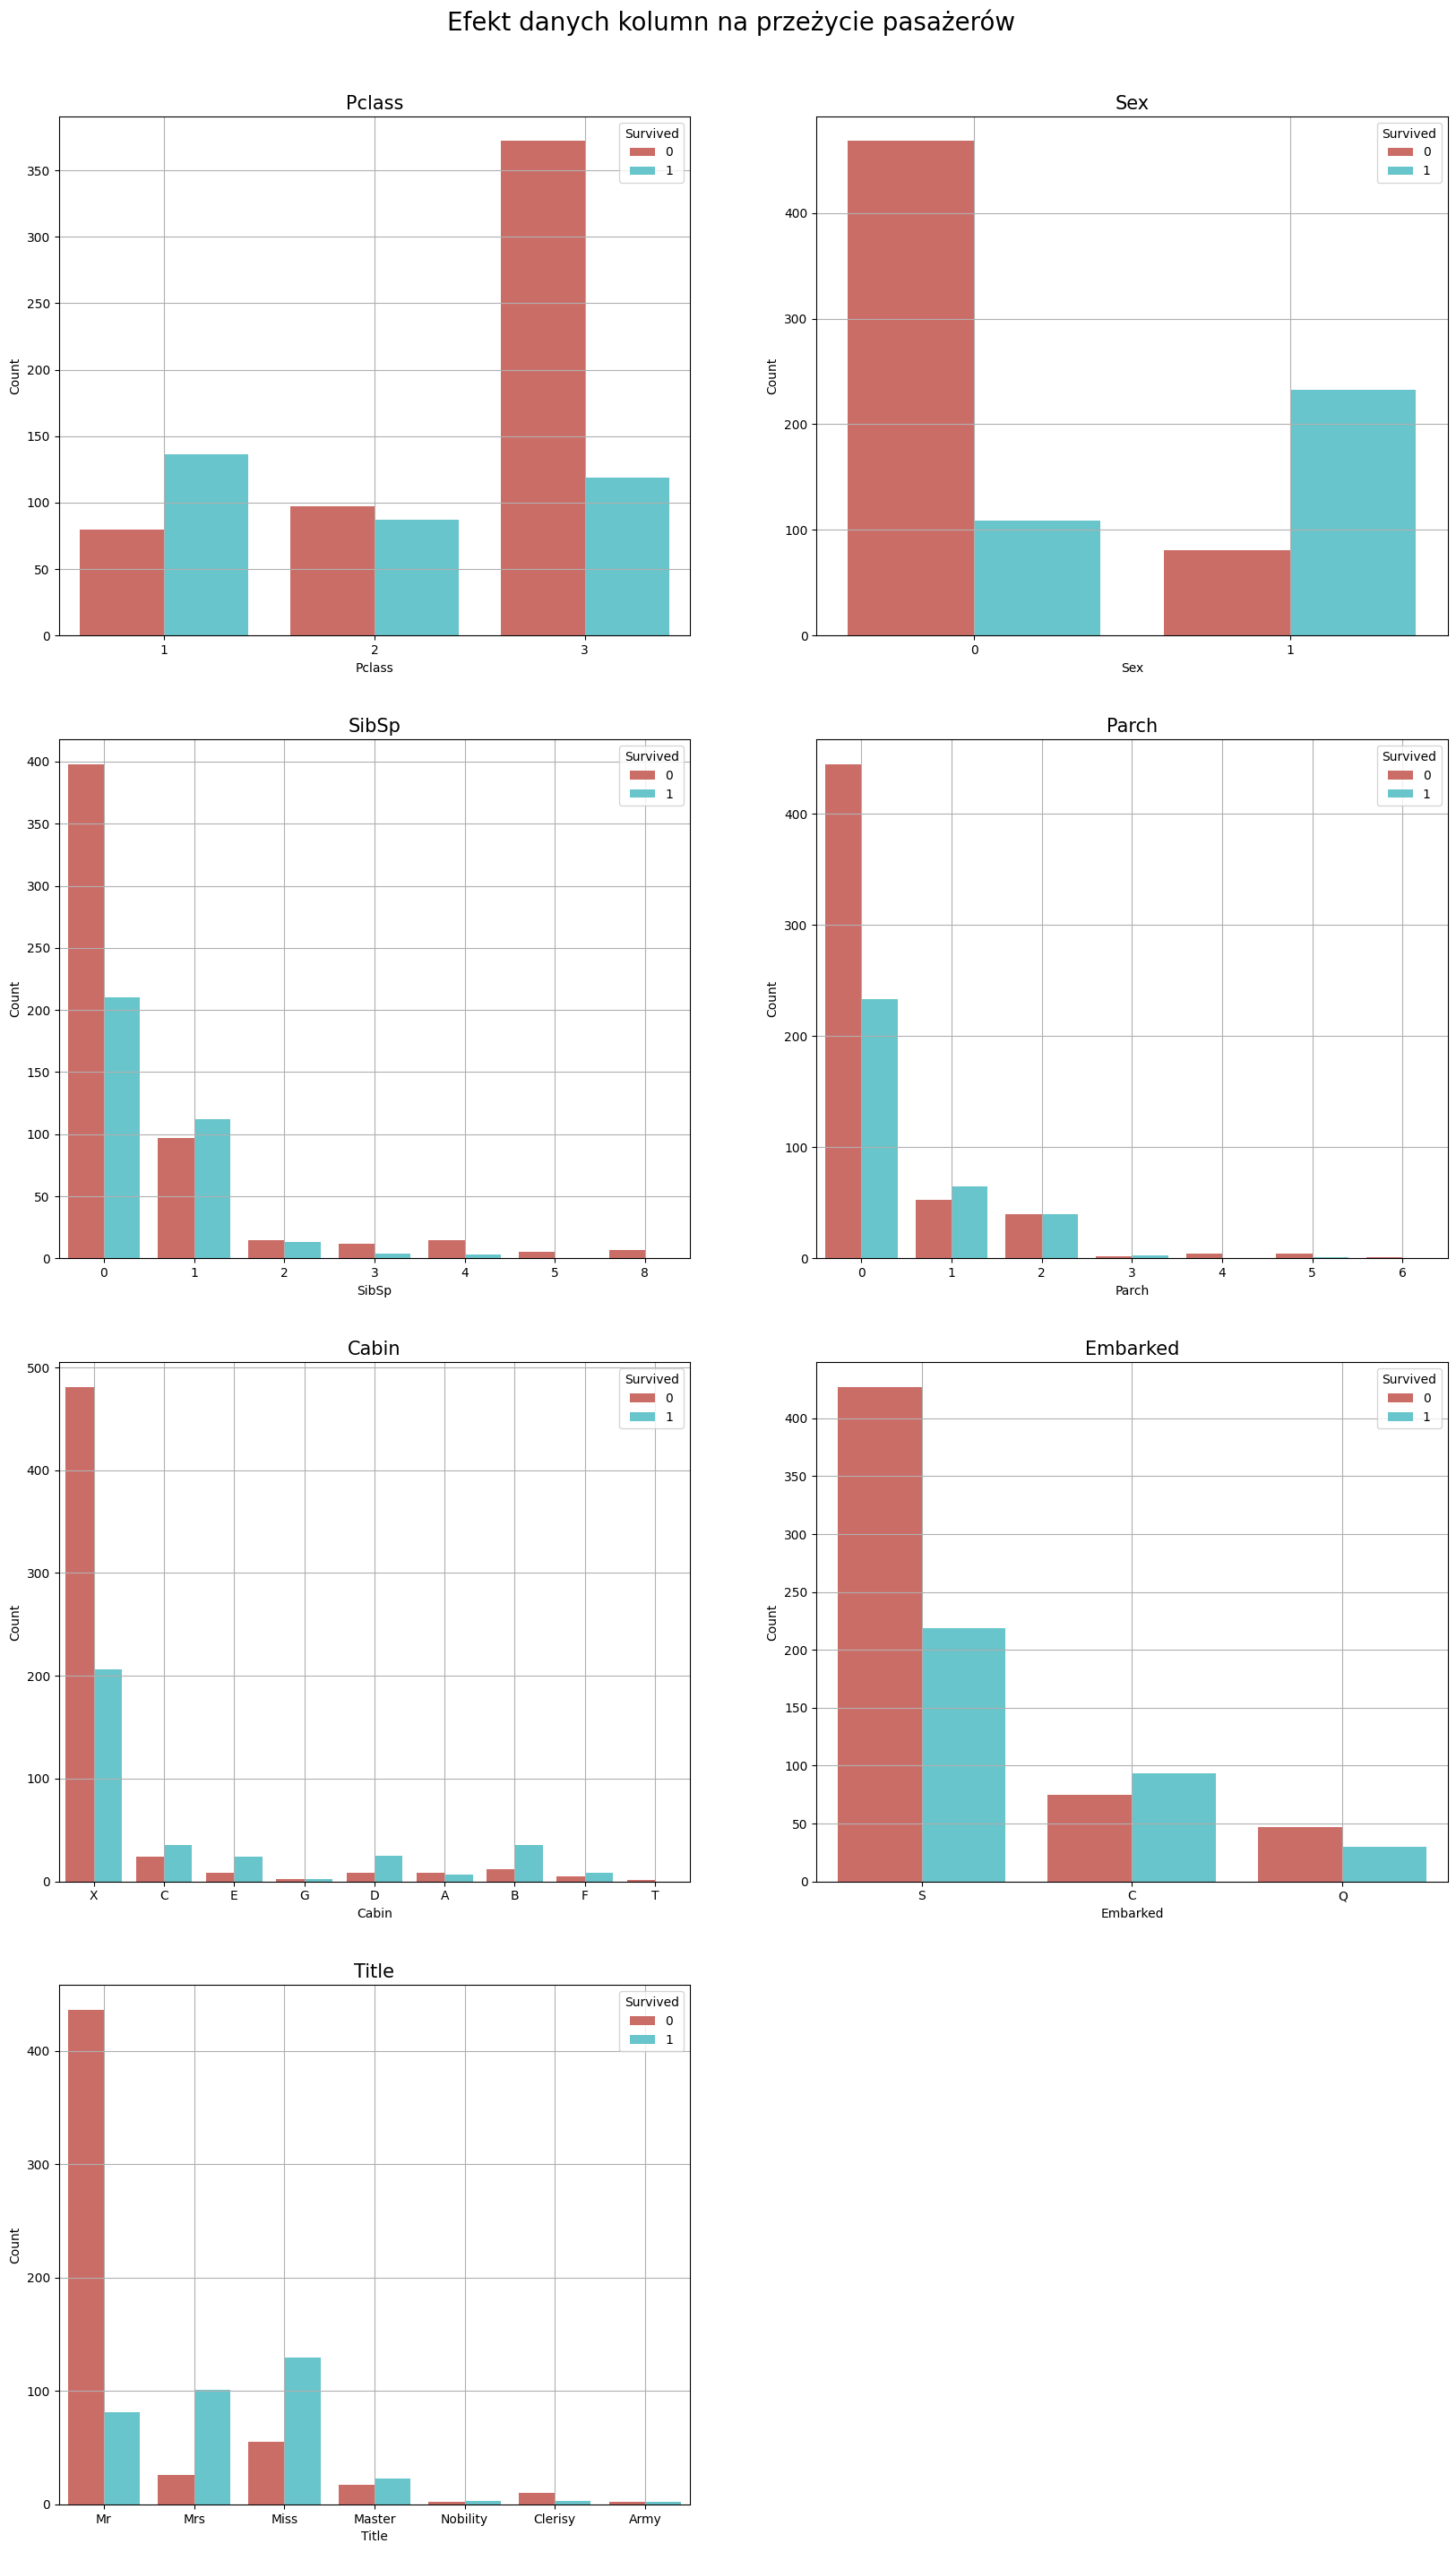

In [17]:
figure1 = plt.figure(figsize=(5, 2))
figure1.set_figwidth(20)
figure1.set_figheight(40)
figure1.suptitle("Efekt danych kolumn na przeżycie pasażerów", fontsize=20)
figure1.subplots_adjust(top=0.95)

index = 0

for col in df.columns:
    if col in ['PassengerId', 'Survived', 'Name', 'Ticket', 'Fare', 'Age']:
        continue
    index +=1
    fig = figure1.add_subplot(5,2, index)
    sns.countplot(x=col, hue='Survived', data=df, palette='hls')
    fig.set_title(col, fontsize=15)
    fig.grid()
    fig.set_xlabel(col, fontsize=10)
    fig.set_ylabel("Count", fontsize=10)

plt.show()

Ze względu na bardzo dużą dystrybucję danyc wykresy dla Fare i Age są nieczytelne dlatego wykresy dla tyc 2 kolumn znajdują się poniżej

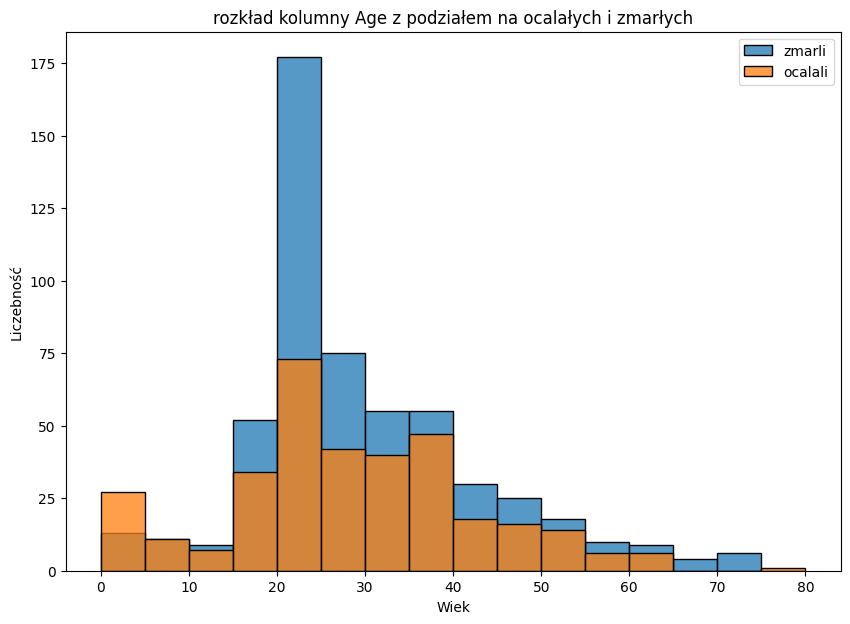

In [18]:
age_of_dead = df.query('Survived == 0')['Age']
age_of_alive = df.query('Survived == 1')['Age']
bins = np.arange(0, 81, 5)

f, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.histplot(ax=ax, bins=bins, data=age_of_dead, label='zmarli')
sns.histplot(ax=ax, bins=bins, data=age_of_alive, label='ocalali')
_ = plt.legend()

plt.title('rozkład kolumny Age z podziałem na ocalałych i zmarłych')
plt.xlabel('Wiek')
plt.ylabel('Liczebność')
plt.show()

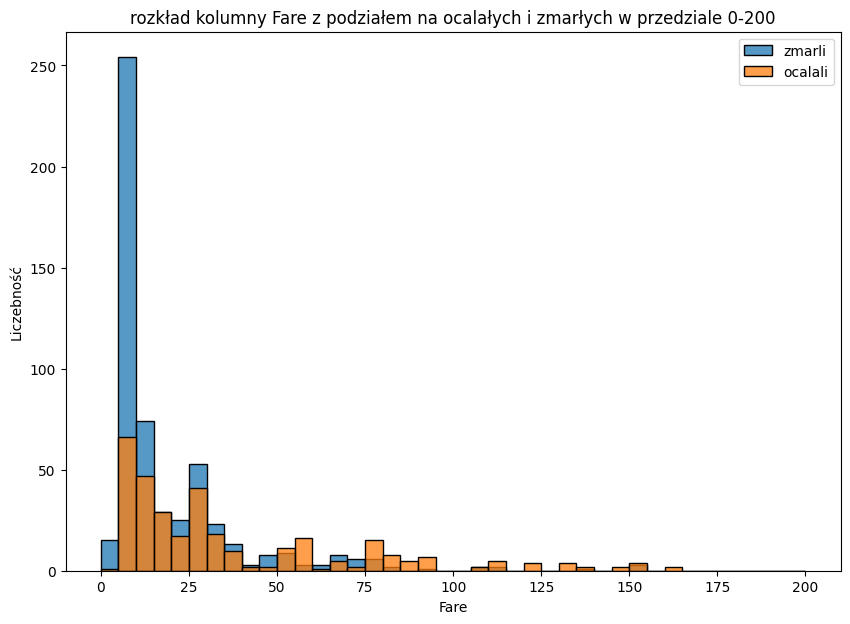

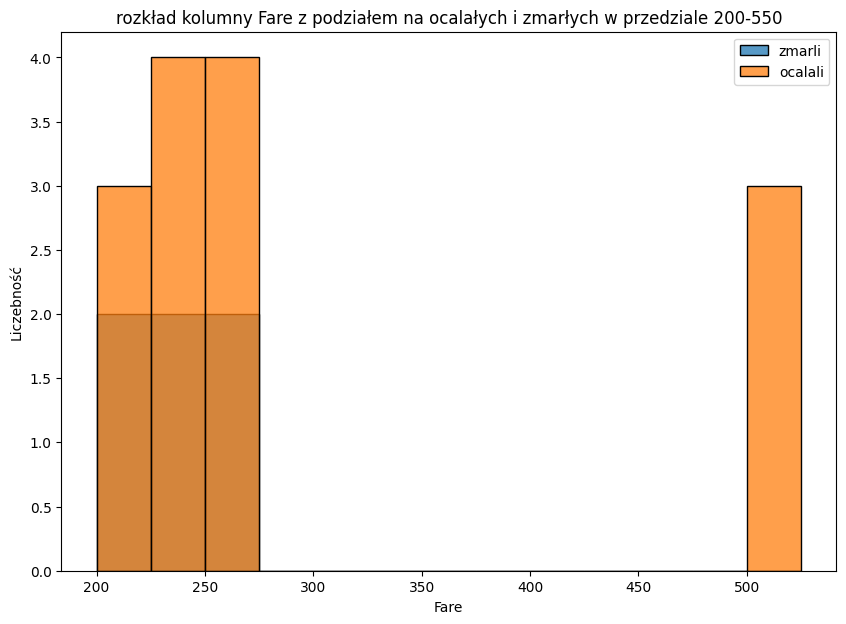

In [19]:
fare_of_dead = df.query('Survived == 0')['Fare']
fare_of_alive = df.query('Survived == 1')['Fare']
bins = np.arange(0, 201, 5)

f, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.histplot(ax=ax, bins=bins, data=fare_of_dead, label='zmarli')
sns.histplot(ax=ax, bins=bins, data=fare_of_alive, label='ocalali')
_ = plt.legend()

plt.title('rozkład kolumny Fare z podziałem na ocalałych i zmarłych w przedziale 0-200')
plt.xlabel('Fare')
plt.ylabel('Liczebność')

plt.show()

bins = np.arange(200, 550, 25)

f, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.histplot(ax=ax, bins=bins, data=fare_of_dead, label='zmarli')
sns.histplot(ax=ax, bins=bins, data=fare_of_alive, label='ocalali')
_ = plt.legend()

plt.title('rozkład kolumny Fare z podziałem na ocalałych i zmarłych w przedziale 200-550')
plt.xlabel('Fare')
plt.ylabel('Liczebność')

plt.show()

## Dalsze manipulacje

Ze względu na duży rozstzał danych spróbujmy pogrupować dane z Fare i Age

In [20]:
df['Age'].describe()

count    891.000000
mean      29.066409
std       13.244532
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
df.loc[ df['Age'] <= 11, 'Age_group'] = 'below_11'
df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'Age_group'] = '11-18'
df.loc[(df['Age'] > 18) & (df['Age'] <= 22), 'Age_group'] = '18-22'
df.loc[(df['Age'] > 22) & (df['Age'] <= 26), 'Age_group'] = '22-26'
df.loc[(df['Age'] > 26) & (df['Age'] <= 33), 'Age_group'] = '26-33'
df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age_group'] = '33-40'
df.loc[(df['Age'] > 40) & (df['Age'] <= 65), 'Age_group'] = '40-65'
df.loc[ df['Age'] > 65, 'Age_group'] = 'above_65'

In [22]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
df.loc[ df['Fare'] <= 7.91, 'Fare_group'] = 'below_7.91'
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare_group'] = '7.91-14.454'
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare_group']   = '14.454-31'
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 100), 'Fare_group']   = '31-100'
df.loc[(df['Fare'] > 100) & (df['Fare'] <= 300), 'Fare_group']   = '100-300'
df.loc[ df['Fare'] > 300, 'Fare_group'] = 'above 300'

Na bazie powyższych wizualizacji, możemy zauważyć, że wartości dla kolumn SibSp i Parch zachowują się bardzo podobnie, należy też zauważyć że oba odnoszą się do konotacji rodzinnych.

Kolumny Fare oraz Age ze względu na duży rozrzut danych można spróbować pogrupować te wartości.

In [24]:
df['Relatives'] = df['Parch'] + df['SibSp'] 

display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Fare_group,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,X,S,Mr,18-22,below_7.91,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs,33-40,31-100,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,22-26,7.91-14.454,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs,33-40,31-100,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,X,S,Mr,33-40,7.91-14.454,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,X,S,Clerisy,26-33,7.91-14.454,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B,S,Miss,18-22,14.454-31,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24.0,1,2,W./C. 6607,23.4500,X,S,Miss,22-26,14.454-31,3
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,C,Mr,22-26,14.454-31,0


Po mapwoaniu wartości na bardziej przystępne i ekstrakcji interesujących nas danych stworzymy kolumny z wartościami binarnymi z pomocą funkcji get_dummies które w odróżnieniu od wartości w zakresie 0-x oznaczających jakieś wartości nie powinny przekłamywać algorytmów

In [25]:
pclass = pd.get_dummies(df['Pclass'], prefix="Pclass")
embarked = pd.get_dummies(df['Embarked'], prefix="Embarked")
title = pd.get_dummies(df['Title'], prefix="Title")
cabin = pd.get_dummies(df['Cabin'], prefix="Cabin")
age_group = pd.get_dummies(df['Age_group'], prefix="Age_g")
fare_group = pd.get_dummies(df['Fare_group'], prefix="Fare_g")

df = pd.concat([df, pclass, embarked, title, cabin], axis=1)

df = df.drop(columns=['Ticket', 'Name', 'Cabin', 'Pclass', 'Embarked', 'Title', 'Age_group', 'Fare_group'], axis=1)

display(df)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Relatives,Pclass_1,Pclass_2,...,Title_Nobility,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,1,0,0,22.0,1,0,7.2500,1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,1,True,False,...,False,False,False,True,False,False,False,False,False,False
2,3,1,1,26.0,0,0,7.9250,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,1,True,False,...,False,False,False,True,False,False,False,False,False,False
4,5,0,0,35.0,0,0,8.0500,0,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,27.0,0,0,13.0000,0,False,True,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,19.0,0,0,30.0000,0,True,False,...,False,False,True,False,False,False,False,False,False,False
888,889,0,1,24.0,1,2,23.4500,3,False,False,...,False,False,False,False,False,False,False,False,False,True
889,890,1,0,26.0,0,0,30.0000,0,True,False,...,False,False,False,True,False,False,False,False,False,False


## Test

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
random_forest = RandomForestClassifier(n_estimators=100)
scaler = MinMaxScaler()

In [27]:
features = list(df.columns)
features.remove('PassengerId')
features.remove('Survived')
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Survived'], test_size=0.2, random_state=42)

scaler.fit(X_train)
train_data = scaler.transform(X_train)
test_data = scaler.transform(X_test)

In [30]:
classifier.fit(train_data, y_train)
y_pred = classifier.predict(test_data)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy - KNN: ", accuracy)

random_forest.fit(train_data, y_train)
y_pred = random_forest.predict(test_data)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy - RForest: ", accuracy)

Accuracy - KNN:  0.8156424581005587
Accuracy - RForest:  0.8156424581005587


## Zapis do csv

In [31]:
df.to_csv('dataframe.csv', index=False)